In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Run this cell to import the Data Wrangler widget to show automatic visualization and generate code to fix data quality issues

import sagemaker_datawrangler

# Display Pandas DataFrame to view the widget: df, display(df), df.sample()... 

In [3]:
# connecting the dataset from 3

bucket_name = 's3://sagemaker-qut/'
path  = 'HR_AWS_PoC_Extract_2017_onwards/'

file_action= path + "dataset_merge_v2.csv" 

data = "{}{}".format(bucket_name,file_action)
df = pd.read_csv(data, index_col = 0)
df 

,EMPLOYEE_GID,ACTIONTYPE,ACTIONREAS,AGE,BUS_AREA,_BIC_TERMDATE,EMPLSTATUS,ANSALARY,GENDER,PAYSCALELV,...,_BIC_EMPL_MNG_GID,CALDAY,ALP_AMOUNT,AMOUNT,DUR_ACTUAL,REPTT,QUANTITY,PLHRS,WRHRS,IS_VOLUNTARY
0,A3DA83F386FE3332052E46359CDFFAAA85C997C1B632AD...,999,2,53,ADL,0,3,0,1,2,...,2D1EC3C399BAD926DD7801983C671C600AC0183B293B9A...,20180726,0,0,7.60,Z0000311,5.32,5.32,5.32,0
1,F3E80C1D5D9A020E331BDE60AD25476AF494E5FD11871A...,16,2,44,NSW,0,3,0,1,2,...,4DD10CFEE73F2EBC077BDD2B73DA392CC45C645513BCAB...,20220806,0,0,3.17,Z0000321,8.00,8.00,8.00,0
2,61E323E67DD15A4F4F4D62806A9630E2CC3BE355FD33F1...,16,2,54,SCM,0,3,0,1,6,...,DE0FD6A06E75F1F11FE31E7F04FED08811E16C19BE8F9C...,20180506,0,0,8.00,Z0000311,12.00,12.00,12.00,0
3,BF1A3D17CF084B56591CE3D9B7FD32B9E86A6FA1F7F08D...,16,2,24,HFJ,0,3,0,1,2,...,5558627B5BAFDE895C0E5F87819557067E3CE46BE7A8CA...,20190820,0,0,1.00,Z0000321,0.00,0.00,0.00,0
4,DF7D8F36DD1817AB6FFEAC0D855590943092A3E4FEE0C8...,16,2,45,NSW,0,3,0,1,2,...,72BE965505D8810E93312AC3362519B0AE38D1BBCC9DC2...,20220220,0,0,8.00,Z0000323,8.00,8.00,8.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386401,F3263D4E443D4C4C6504EA46A0798A3F0A7A12D7E11610...,16,2,40,BNE,0,3,0,2,2,...,DE1656C0B7B30C13A9134A5D8BDF98CF1BCFA5016FB812...,20200102,0,0,7.60,Z0000311,7.60,7.60,7.60,0
386402,65DD55287931DD97B0D665B16A1120D9A207B0E21414FB...,16,2,35,ADL,0,3,0,2,2,...,1DF2E9A006D8A2FDC377FF987FDFCD6D648857A8662A69...,20180806,0,0,6.50,Z0000311,0.00,0.00,0.00,0
386403,E733817E3AF61AC1084BEA7621598E94D890AB0514015B...,16,2,42,NSW,0,3,0,1,2,...,E6FFA45D9AF1F8352C1B4E0C7764EE55DBFCB28403DDBC...,20190425,0,0,2.00,Z0000202,8.00,8.00,8.00,0
386404,03FFCF1110F418D0D7FF71DCAEC6FF34A17F0A48532F95...,16,2,44,ADL,0,3,0,1,2,...,244FE5E7C236812F196B0D907D50E11E6C258BB6AE394C...,20210924,0,0,6.60,Z0000202,11.50,11.50,11.50,0


### Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
# Initially divide the data into 80% and 20%. 80% for training and remaining 20% for test and validation.
train_ds, rest_ds = train_test_split(df, train_size=0.8, shuffle=False)

In [5]:
#Now you can split the remaining data into 50% each to have 10% validation and 10% test.
validation_ds, test_ds = train_test_split(rest_ds, test_size=0.5, shuffle=False)

## Neural Network model

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386406 entries, 0 to 386405
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EMPLOYEE_GID       386406 non-null  object 
 1   ACTIONTYPE         386406 non-null  int64  
 2   ACTIONREAS         386406 non-null  int64  
 3   AGE                386406 non-null  int64  
 4   BUS_AREA           386406 non-null  object 
 5   _BIC_TERMDATE      386406 non-null  int64  
 6   EMPLSTATUS         386406 non-null  int64  
 7   ANSALARY           386406 non-null  int64  
 8   GENDER             386406 non-null  int64  
 9   PAYSCALELV         386406 non-null  object 
 10  PAYSCALEAR         386406 non-null  object 
 11  PAYSCALEGR         386406 non-null  object 
 12  _BIC_HRARBST       386406 non-null  float64
 13  _BIC_HRDIVGV       386406 non-null  float64
 14  _BIC_HRJRSTD       386406 non-null  float64
 15  _BIC_HRSALARY      386406 non-null  int64  
 16  _B

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split

# preprocessing the data and splitting it
y = df['IS_VOLUNTARY']
X=df.drop(['IS_VOLUNTARY'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X=pd.DataFrame(X)

# define the columns to transform
categorical_cols = ['BUS_AREA', 'PAYSCALELV', 'PAYSCALEAR', 'PAYSCALEGR', 'PAYSCALELV']
numerical_cols = ['_BIC_TERMDATE', 'EMPLSTATUS','AGE', 'GENDER', 'ANSALARY', 'DUR_ACTUAL', '_BIC_HRARBST', '_BIC_HRDIVGV', '_BIC_HRJRSTD', '_BIC_HRSALARY', '_BIC_WHPERIOD', '_BIC_HRSALARY', 'CALDAY', 'QUANTITY', 'ALP_AMOUNT', 'AMOUNT', 'DUR_ACTUAL', 'PLHRS', 'WRHRS']

# # define the transformers
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

# # define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])


# # fit and transform the data using the column transformer
X_transformed = preprocessor.fit_transform(df)



In [8]:
# loading the data and spliting for the neural network
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.2,random_state=0)

In [9]:
import time

# define and train the model
# models=[('model_nn1','tanh'),('model_nn2','identity'),('model_nn3', 'logistic'),('model_nn4','relu')]
## model 1
start_time = time.time()
model_nn1 = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='adam')
model_nn1.fit(X_train, y_train)

# y_pred_i = model_nnmodelNo.predct(X_test)
# evaluate the model
train_acc = model_nn1.score(X_train, y_train)
test_acc = model_nn1.score(X_test, y_test)
end_time = time.time()
print('model_nn1', ' with ','tanh')
print(f"Training accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f} ")
print('time taken : ', end_time - start_time , '\n\n')

## model 1
start_time = time.time()
model_nn2 = MLPRegressor(hidden_layer_sizes=(100,), activation='identity', solver='adam')
model_nn2.fit(X_train, y_train)

# y_pred_i = model_nnmodelNo.predct(X_test)
# evaluate the model
train_acc = model_nn2.score(X_train, y_train)
test_acc = model_nn2.score(X_test, y_test)
end_time = time.time()
print('model_nn2', ' with ','identity')
print(f"Training accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f} ")
print('time taken : ', end_time - start_time, '\n\n')

## model 3
start_time = time.time()
model_nn3 = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam')
model_nn3.fit(X_train, y_train)

# y_pred_i = model_nnmodelNo.predct(X_test)
# evaluate the model
train_acc = model_nn3.score(X_train, y_train)
test_acc = model_nn3.score(X_test, y_test)
end_time = time.time()
print('model_nn3', ' with ','relu')
print(f"Training accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f} ")
print('time taken : ', end_time - start_time, '\n\n')

## model 4
start_time = time.time()
model_nn4 = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='adam')
model_nn4.fit(X_train, y_train)

# y_pred_i = model_nnmodelNo.predct(X_test)
# evaluate the model
train_acc = model_nn4.score(X_train, y_train)
test_acc = model_nn4.score(X_test, y_test)
end_time = time.time()
print('model_nn4', ' with ','logistic')
print(f"Training accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f} ")
print('time taken : ', end_time - start_time, '\n\n')

model_nn1  with  tanh
Training accuracy: 0.881
Test accuracy: 0.872 
time taken :  91.70933938026428 


model_nn2  with  identity
Training accuracy: 0.622
Test accuracy: 0.658 
time taken :  70.89130473136902 


model_nn3  with  relu
Training accuracy: 0.903
Test accuracy: 0.894 
time taken :  79.15460228919983 


model_nn4  with  logistic
Training accuracy: 0.836
Test accuracy: 0.832 
time taken :  89.77659559249878 




In [10]:
print(X_train.shape)

(309124, 347)


In [16]:
from sklearn.model_selection import GridSearchCV

params = {'hidden_layer_sizes': [(x,) for x in range(48, 348, 50)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPRegressor(random_state=10),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)

KeyboardInterrupt: 

Total number of models:  6


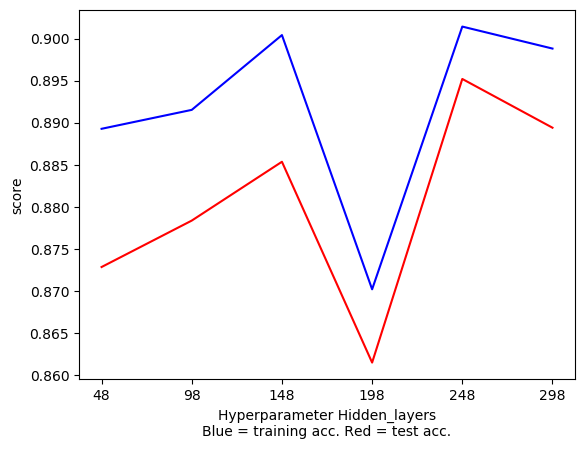

In [13]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(48,348,50))
plt.ylabel('score')
plt.show()

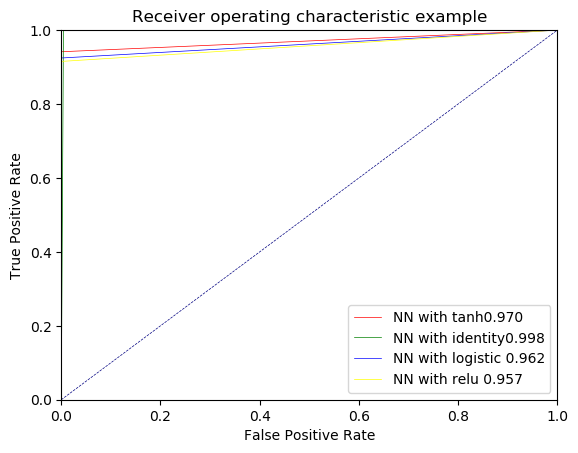

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba_nn_1=model_nn1.predict(X_test)
y_pred_proba_nn_1_bin = [1 if pred >= 0.5 else 0 for pred in y_pred_proba_nn_1]
y_pred_proba_nn_2=model_nn2.predict(X_test)
y_pred_proba_nn_2_bin = [1 if pred >= 0.5 else 0 for pred in y_pred_proba_nn_2]
y_pred_proba_nn_3=model_nn3.predict(X_test)
y_pred_proba_nn_3_bin = [1 if pred >= 0.5 else 0 for pred in y_pred_proba_nn_3]
y_pred_proba_nn_4=model_nn4.predict(X_test)
y_pred_proba_nn_4_bin = [1 if pred >= 0.5 else 0 for pred in y_pred_proba_nn_4]
# y_pred_proba_nn_5=cv_1.predict(X_test)

roc_index_nn_1=roc_auc_score(y_test, y_pred_proba_nn_1_bin)
roc_index_nn_2=roc_auc_score(y_test, y_pred_proba_nn_2_bin)
roc_index_nn_3=roc_auc_score(y_test, y_pred_proba_nn_3_bin)
roc_index_nn_4=roc_auc_score(y_test, y_pred_proba_nn_4_bin)
# roc_index_nn_5=roc_auc_score(y_test, y_pred_proba_nn_5[:,1])

fpr_nn_1,tpr_nn_1,thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1_bin)
fpr_nn_2,tpr_nn_2,thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2_bin)
fpr_nn_3,tpr_nn_3,thresholds_nn_3 = roc_curve(y_test, y_pred_proba_nn_3_bin)
fpr_nn_4,tpr_nn_4,thresholds_nn_4 = roc_curve(y_test, y_pred_proba_nn_4_bin)
# fpr_nn_5,tpr_nn_5,thresholds_nn_5 = roc_curve(y_test, y_pred_proba_nn_5[:,1])


plt.plot(fpr_nn_1, tpr_nn_1, label='NN with tanh{:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with identity{:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_nn_3,tpr_nn_3, label='NN with logistic {:.3f}'.format(roc_index_nn_3), color='blue', lw=0.5)
plt.plot(fpr_nn_4,tpr_nn_4, label='NN with relu {:.3f}'.format(roc_index_nn_4), color='yellow', lw=0.5)
# plt.plot(fpr_nn_5,tpr_nn_5, label='NN cv_1 {:.3f}'.format(roc_index_nn_5), color='cyan', lw=0.5)



plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [24]:
# model_names = [model_nn1,model_nn2,model_nn3,model_nn4,cv_1]

# for m in model_names:
#     print(str(m))
# model 1
feature_names = X.columns
coef = sorted(model_nn1.coefs_[-1][:20],reverse=True)
# coef = coef[:20]

print('For model 1 ')
for i in range (len(coef)):
    print (feature_names[i],':',coef[i]) 
print('\n')

# model 2
feature_names = X.columns
coef = sorted(model_nn2.coefs_[-1][:20],reverse=True)
# coef = coef[:20]

print('For model 2 ')
for i in range (len(coef)):
    print (feature_names[i],':',coef[i]) 
print('\n')

# model 3
feature_names = X.columns
coef = sorted(model_nn3.coefs_[-1][:20],reverse=True)
# coef = coef[:20]

print('For model 3 ')
for i in range (len(coef)):
    print (feature_names[i],':',coef[i]) 
print('\n')

# model 4
feature_names = X.columns
coef = sorted(model_nn4.coefs_[-1][:20],reverse=True)
# coef = coef[:20]

print('For model 4 ')
for i in range (len(coef)):
    print (feature_names[i],':',coef[i]) 
print('\n')


# # model 5
# feature_names = X.columns
# coef = cv_1.coefs_[-1][:20]
# # coef = coef[:20]

# print('For model 5 ')
# for i in range (len(coef)):
#     print (feature_names[i],':',coef[i]) 
# print('\n')



For model 1 
EMPLOYEE_GID : [0.14269667]
ACTIONTYPE : [0.09071313]
ACTIONREAS : [0.06360364]
AGE : [0.05911406]
BUS_AREA : [0.0567854]
_BIC_TERMDATE : [0.00079966]
EMPLSTATUS : [0.00048911]
ANSALARY : [-8.91397215e-05]
GENDER : [-0.00026701]
PAYSCALELV : [-0.00102228]
PAYSCALEAR : [-0.001165]
PAYSCALEGR : [-0.00168654]
_BIC_HRARBST : [-0.00181439]
_BIC_HRDIVGV : [-0.00206579]
_BIC_HRJRSTD : [-0.01464713]
_BIC_HRSALARY : [-0.02763913]
_BIC_WHPERIOD : [-0.0626353]
_BIC_EMPL_MNG_GID : [-0.0632911]
CALDAY : [-0.08771469]
ALP_AMOUNT : [-0.10150066]


For model 2 
EMPLOYEE_GID : [0.01199297]
ACTIONTYPE : [0.00375821]
ACTIONREAS : [0.00348446]
AGE : [0.00194085]
BUS_AREA : [0.00145923]
_BIC_TERMDATE : [0.00062792]
EMPLSTATUS : [-8.97163947e-05]
ANSALARY : [-0.00063054]
GENDER : [-0.00089116]
PAYSCALELV : [-0.00131641]
PAYSCALEAR : [-0.00145982]
PAYSCALEGR : [-0.00175913]
_BIC_HRARBST : [-0.00350339]
_BIC_HRDIVGV : [-0.00427176]
_BIC_HRJRSTD : [-0.00479326]
_BIC_HRSALARY : [-0.00525466]
_BIC_W